In [ ]:
# Celda 1: Importar librerías y cargar dataset original
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Cargar dataset original sin transformaciones
dataset_original, info = tfds.load(
    'cats_vs_dogs',
    split='train',
    with_info=True,
    as_supervised=True
)

print("Número total de imágenes:", info.splits['train'].num_examples)
print("Etiquetas:", info.features['label'].names)  # ['cat', 'dog']





Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.SEEUYU_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.
Número total de imágenes: 23262
Etiquetas: ['cat', 'dog']


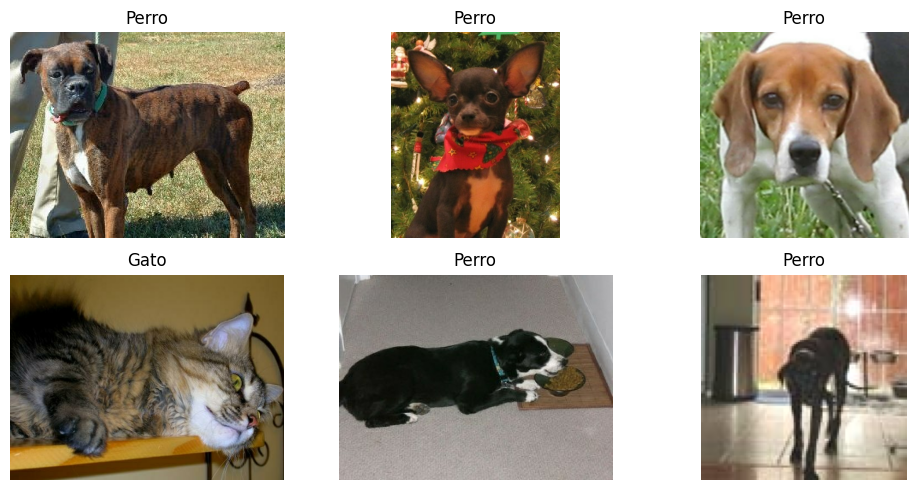

In [ ]:
# Celda 2: Función para mostrar ejemplos antes del preprocesamiento
def mostrar_ejemplos(dataset, cantidad=6):
    plt.figure(figsize=(10, 5))
    for i, (imagen, etiqueta) in enumerate(dataset.take(cantidad)):
        plt.subplot(2, 3, i + 1)
        plt.imshow(imagen.numpy().astype("uint8"))
        plt.title("Perro" if etiqueta == 1 else "Gato")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

# Mostrar algunos ejemplos
mostrar_ejemplos(dataset_original)


In [ ]:
# Celda 3: Preprocesamiento (redimensionar y normalizar)
TAMANO_IMG = 128

def preprocesar(imagen, etiqueta):
    imagen = tf.image.resize(imagen, (TAMANO_IMG, TAMANO_IMG))
    imagen = imagen / 255.0
    return imagen, etiqueta

# Aplicar preprocesamiento al dataset original
dataset_processed = dataset_original.map(preprocesar, num_parallel_calls=tf.data.AUTOTUNE)



In [ ]:
# Celda 4: Shuffle, batch y prefetch
BATCH_SIZE = 32

dataset_processed = dataset_processed.shuffle(info.splits['train'].num_examples)
dataset_processed = dataset_processed.batch(BATCH_SIZE)
dataset_processed = dataset_processed.prefetch(tf.data.AUTOTUNE)


In [ ]:
 # Celda 5: Definir modelo CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(TAMANO_IMG, TAMANO_IMG, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.summary()


model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Celda 6: Compilar el modelo
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [ ]:
# Celda 7: Entrenar el modelo
EPOCHS = 5

history = model.fit(
    dataset_processed,
    epochs=EPOCHS
)


Epoch 1/5
727/727 ━━━━━━━━━━━━━━━━━━━━ 692s 908ms/step - accuracy: 0.5852 - loss: 0.6655
Epoch 2/5
727/727 ━━━━━━━━━━━━━━━━━━━━ 722s 876ms/step - accuracy: 0.7675 - loss: 0.4831
Epoch 3/5
727/727 ━━━━━━━━━━━━━━━━━━━━ 635s 832ms/step - accuracy: 0.8238 - loss: 0.3881
Epoch 4/5
727/727 ━━━━━━━━━━━━━━━━━━━━ 698s 852ms/step - accuracy: 0.8707 - loss: 0.2987
Epoch 5/5
